# Caçador de OVNIs

Em que estado e horário é mais "fácil" de avistar um OVNI nos EUA?

### Importando o que importa

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

### Lendo o arquivo com todas as ocorrências

In [2]:
df = pd.read_json('ovnis.json')

### Visualizando uma amostra dos dados

In [3]:
df.head()

,occured,city,state,shape,duration,summary,posted
0,12/22/19 23:00,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,12/22/19
1,12/22/19 22:15,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,12/22/19
2,12/22/19 21:00,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",12/22/19
3,12/22/19 20:35,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",12/22/19
4,12/22/19 20:00,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,12/22/19


### Renomeando as colunas

In [4]:
df.columns = ['ocorrido', 'cidade', 'estado', 'forma', 'duração', 'relato', 'postado']

### Convertendo as colunas com datas de <code>string</code> para <code>datetime</code>

In [5]:
df['ocorrido'] = pd.to_datetime(df['ocorrido'])
df['postado'] = pd.to_datetime(df['postado'])

In [6]:
df.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
0,2019-12-22 23:00:00,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,2019-12-22
1,2019-12-22 22:15:00,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,2019-12-22
2,2019-12-22 21:00:00,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",2019-12-22
3,2019-12-22 20:35:00,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",2019-12-22
4,2019-12-22 20:00:00,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,2019-12-22


### Limpando os relatos com dados faltantes

In [7]:
df_dropped = df.dropna()

In [8]:
df_dropped.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
0,2019-12-22 23:00:00,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,2019-12-22
1,2019-12-22 22:15:00,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,2019-12-22
2,2019-12-22 21:00:00,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",2019-12-22
3,2019-12-22 20:35:00,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",2019-12-22
4,2019-12-22 20:00:00,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,2019-12-22


### Agrupando os resultados por estado

In [9]:
ocorrencias_por_estado = df_dropped.groupby('estado')['ocorrido'].count()

In [10]:
ocorrencias_por_estado.sort_values(ascending=False, inplace=True)

### Plotando os 10 estados com mais ocorrências

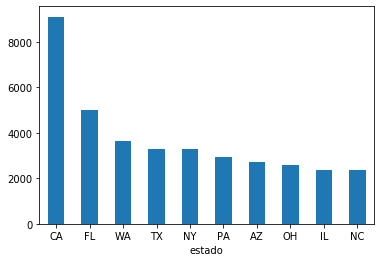

In [11]:
ocorrencias_por_estado.head(10).plot.bar(rot=0)

### Extraindo um subset com somente com os dados da Califórnia

In [23]:
selector = df_dropped['estado'] == "CA"

In [24]:
california = df_dropped[selector]

In [25]:
california.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
21,2019-12-22 19:15:00,Anaheim Hills,CA,Circle,on now,Three fwhite ussy lights were seen traveling i...,2019-12-22
41,2019-12-22 18:10:00,Castro Valley,CA,Formation,5min,Lights in sky in straight line at satellite he...,2019-12-22
42,2019-12-22 18:00:00,Hayward,CA,Light,15 min,OBJECTS APPEAR AS SATELLITES IN FORMATION. ((...,2019-12-22
43,2019-12-22 18:00:00,Salinas,CA,Light,~15min,31 UFOs seen traveling SW to NE in a mostly ev...,2019-12-22
44,2019-12-22 18:00:00,Santa Cruz,CA,Sphere,5 minutes,satellite like looking objects single file lin...,2019-12-22


### Extraindo a hora de cada ocorrência e adicionando em uma nova coluna

In [27]:
california['hora'] = california['ocorrido'].dt.hour

### Plotando um <code>histograma</code> para examinar a distribuição de ocorrências

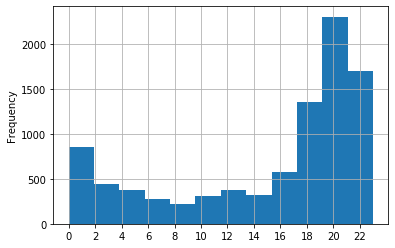

In [34]:
hora_hist = california['hora'].plot.hist(bins=12, grid=True)
plt.xticks(range(california['hora'].min(), california['hora'].max()+1, 2))
plt.show()

# Desafio

### Qual os 5 formatos de OVNI mais comuns nos relatos?

In [17]:
df_dropped.groupby('forma')['ocorrido'].count().sort_values(ascending=False).head()

forma
Light       16865
Circle       9154
Triangle     7280
Fireball     6612
Unknown      5685
Name: ocorrido, dtype: int64

### Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

In [18]:
selector = df_dropped['forma'] == 'Cigar'

In [19]:
charutos = df_dropped[selector]

In [35]:
charutos.head(3)

,ocorrido,cidade,estado,forma,duração,relato,postado,hora
85,2019-12-20 06:45:00,Evans Georgia,GA,Cigar,3 minutes,Possible jet with cigar looking Sharp no light...,2019-12-22,6
89,2019-12-20 06:00:00,Savannah,GA,Cigar,3 minutes,A cigar-shaped object flew overhead leaving a ...,2019-12-22,6
103,2019-12-19 17:04:00,Point Harbor,NC,Cigar,3 minutes,14-16 lights moving in different directions bu...,2019-12-22,17


In [28]:
charutos['hora'] = charutos['ocorrido'].dt.hour

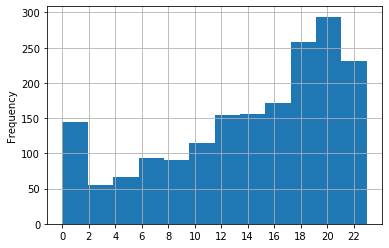

In [33]:
hora_hist = charutos['hora'].plot.hist(bins=12, grid=True)
plt.xticks(range(charutos['hora'].min(), charutos['hora'].max()+1, 2))
plt.show()